# 14. GHZ-Zustände

Bisher haben wir immer nur zwei Qubits miteinander verschränkt. Ausgehend von den Grundzuständen $|00\rangle$, $|01\rangle$, $|10\rangle$ und $|11\rangle$ erhielten wir die vier Bell-Zustände:

$$
\begin{aligned}
   |00\rangle\longmapsto \Phi^+=\frac{1}{\sqrt{2}}|00\rangle+\frac{1}{\sqrt{2}}|11\rangle\\
   |01\rangle\longmapsto \Psi^+=\frac{1}{\sqrt{2}}|01\rangle+\frac{1}{\sqrt{2}}|10\rangle\\
   |10\rangle\longmapsto \Phi^-=\frac{1}{\sqrt{2}}|00\rangle-\frac{1}{\sqrt{2}}|11\rangle\\
   |11\rangle\longmapsto \Psi^-=\frac{1}{\sqrt{2}}|01\rangle-\frac{1}{\sqrt{2}}|10\rangle
    \end{aligned}
$$

Die vier Zustandsvektoren $|00\rangle$, $|01\rangle$, $|10\rangle$ und $|11\rangle$ bilden die **Standard-Basis** eines Zwei-Qubit-Registers. Sämtliche Zustände eines solchen Registers lassen sich als Linearkombination dieser vier Basisvektoren schreiben. Ebenso bilden die vier Bell-Zustände eine Basis dieses Raumes. Wir nennen Sie **Bell-Basis**.

Nun lassen stellt sich die Frage: Lassen sich auch drei oder mehr Qubits miteinander verschränken?

Ein Beispiel eines vollständig verschränkten Zustandes aus drei Qubits ist der Zustand:

$$|GHZ\rangle_3=\frac{1}{\sqrt{2}}\left(|000\rangle+|111\rangle\right)$$

Er wurde 1989 von den drei Pysikern **Greenberger**, **Horne** und **Zeilinger** erstmals als Gedankenexperiment vorgeschlagen. Wir wollen diesen Zustand und weitere Beispiele hier mit Qiskit umsetzen.


### Beschreibung des Schaltkreises für den $|GHZ\rangle_3$-Zustand

Schauen wir uns zuerst den Schaltkreis an der den Zustand $|GHZ\rangle_3$ aus dem Anfangszustand $|000\rangle$ erzeugt. Im ersten Schritt wenden wir die drei Gates `.h(0)`, `.cx(0, 1)` und `.cx(0, 2)` auf den Schaltkreis `circuit = QuantumCircuit(3, 3)` an und zeichnen den Schaltkreis mit MatPlotLib.

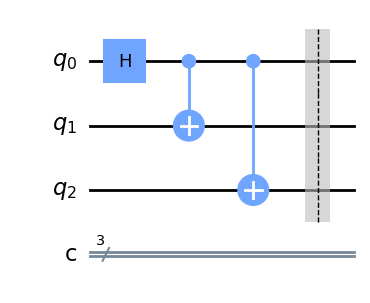

In [1]:
from qiskit import QuantumCircuit, execute, BasicAer

#qreg_q = QuantumRegister(3, 'q')
#creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(3, 3)

circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.barrier()

circuit.draw('mpl')

Anschliessend berechnen wir den Zustandsvektor mithilfe von `statevector_simulator`:

In [2]:
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circuit, backend).result().get_statevector()
print(result)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Schliesslich lesen wir die drei Qubits aus:

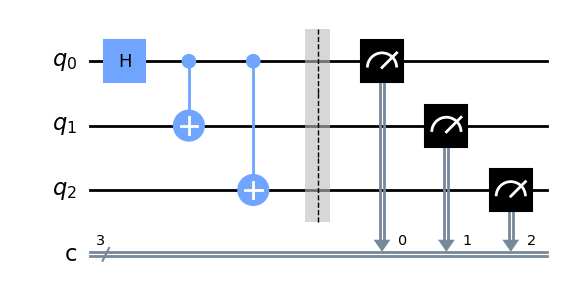

In [3]:
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.measure(2, 2)
circuit.draw('mpl')

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend).result().get_counts()
print(result)

{'000': 536, '111': 488}


Auch die Messungen mit 1024 Durchgängen bestätigen dieses Resultat (mit den statistischen Schwankungen).

### Analyse

Rechnen wir von Hand nach:

- erster Folgezustand: &nbsp;&nbsp;$\phi_1=H |000\rangle=\frac{1}{\sqrt{2}}\left(|000\rangle+|001\rangle\right)$
- zweiter Folgezustand: $\phi_2=CNOT(0,1) H |000\rangle=\frac{1}{\sqrt{2}}\left(|000\rangle+|011\rangle\right)$
- dritter Folgezustand: &nbsp;$\phi_3=CNOT(0,2) CNOT(0,1) H |000\rangle=\frac{1}{\sqrt{2}}\left(|000\rangle+|111\rangle\right)$

Der Zustandsvektor ist in der Basis $|000\rangle$, $|001\rangle$, ..., $|111\rangle$ (acht Basisvektoren): $\frac{1}{\sqrt{2}}|000\rangle+\frac{1}{\sqrt{2}}|111\rangle= \frac{1}{\sqrt{2}}\begin{bmatrix} 1\\0\\0\\0\\0\\0\\0\\0\end{bmatrix}+ \frac{1}{\sqrt{2}}\begin{bmatrix} 0\\0\\0\\0\\0\\0\\0\\1\end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix} 1\\0\\0\\0\\0\\0\\0\\1\end{bmatrix}$

Als Zeilenvektor geschrieben: $\frac{1}{\sqrt{2}}\begin{bmatrix} 1&0&0&0&0&0&0&1\end{bmatrix}=\begin{bmatrix} \frac{1}{\sqrt{2}}&0&0&0&0&0&0&\frac{1}{\sqrt{2}}\end{bmatrix}=\begin{bmatrix} 0.70710678&0&0&0&0&0&0&0.70710678\end{bmatrix}$

Das entspricht exakt der Ausgabe des Statevector-Simulators (jeweils unter Weglassung der imaginären Einheit).


### Wie viele GHZ-Zustände gibt es?

Ausgehend von $\frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle\right)$ finden wir weitere vollständig verschränkte Zustände, indem wir Kombinationen suchen, die **keine Faktorisierung** zulassen. Listen wir alle diese Möglichkeiten auf:

- $\frac{1}{\sqrt{2}}\left(|000\rangle\pm |111\rangle\right)$
- $\frac{1}{\sqrt{2}}\left(|001\rangle\pm |110\rangle\right)$
- $\frac{1}{\sqrt{2}}\left(|010\rangle\pm |101\rangle\right)$
- $\frac{1}{\sqrt{2}}\left(|100\rangle\pm |011\rangle\right)$

Wir finden acht solche Möglichkeiten.


**Aufgabe** Wie können diese Zustände mit dem obigen Schaltkreis erzeugt werden?

Da wir bei drei Qubits eihnen achtdimensionalen Zustandsraum haben, gehen wir analog zu den Bell-Zuständen vor. Wir lassen also der Reihe nach alle Basiszustände der Standardbasis

$|000\rangle$, $|001\rangle$, $|010\rangle$, $|011\rangle$, $|100\rangle$, $|101\rangle$, $|110\rangle$, $|111\rangle$

durch obigen Schaltkreis laufen, indem wir an jeder $1$ ein $X$-Gate setzen. Dazu listen wir das Programm noch einmal zusammenhängend auf und beginnen mit $|001\rangle$:

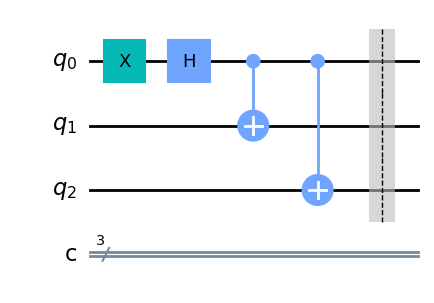

In [5]:
from qiskit import QuantumCircuit, execute, BasicAer

#qreg_q = QuantumRegister(3, 'q')
#creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(3, 3)
circuit.x(0)
#circuit.x([2, 1])
#circuit.x([0, 1, 2])
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.barrier()
circuit.draw('mpl')

In [6]:
backend = BasicAer.get_backend('statevector_simulator')
result = execute(circuit, backend).result().get_statevector()
circuit.draw('mpl')
print(result)

[ 0.70710678+0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678-8.65956056e-17j]


**Aufgabe:** Probieren Sie die verbleibenden sechs Möglichkeiten jetzt selbst durch und notieren Sie sich jeweils das Resultat. Die `#circuit.x([2, 1])` kommentieren Sie entsprechend der Reihenfolge aus. 

**Lösung:**

Zur Kontrolle hier die Lösungen:

$|000\rangle \longrightarrow \frac{1}{\sqrt{2}}\begin{bmatrix} 1&0&0&0&0&0&0&1\end{bmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$C_x$-Gates:&nbsp;&nbsp; -

$|001\rangle \longrightarrow \frac{1}{\sqrt{2}}\begin{bmatrix} 1&0&0&0&0&0&0&-1\end{bmatrix}$&nbsp;&nbsp;&nbsp;$C_x$-Gates:&nbsp;&nbsp; `circuit.x(0)` 

$|010\rangle \longrightarrow \frac{1}{\sqrt{2}}\begin{bmatrix} 0&0&1&0&0&1&0&0\end{bmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$C_x$-Gates:&nbsp;&nbsp; `circuit.x(1)`

$|011\rangle \longrightarrow \frac{1}{\sqrt{2}}\begin{bmatrix} 0&0&1&0&0&-1&0&0\end{bmatrix}$&nbsp;&nbsp;&nbsp;$C_x$-Gates:&nbsp;&nbsp; `circuit.x([0, 1])`

$|100\rangle \longrightarrow \frac{1}{\sqrt{2}}\begin{bmatrix} 0&0&0&1&1&0&0&0\end{bmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$C_x$-Gates:&nbsp;&nbsp; `circuit.x(2)` 

$|101\rangle \longrightarrow \frac{1}{\sqrt{2}}\begin{bmatrix} 0&0&0&-1&1&0&0&0\end{bmatrix}$&nbsp;&nbsp;&nbsp;$C_x$-Gates:&nbsp;&nbsp; `circuit.x([0, 2])`

$|110\rangle \longrightarrow \frac{1}{\sqrt{2}}\begin{bmatrix} 0&1&0&0&0&0&1&0\end{bmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$C_x$-Gates:&nbsp;&nbsp; `circuit.x([1, 2])`

$|111\rangle \longrightarrow \frac{1}{\sqrt{2}}\begin{bmatrix} 0&-1&0&0&0&0&1&0\end{bmatrix}$&nbsp;&nbsp;&nbsp;$C_x$-Gates:&nbsp;&nbsp; `circuit.x([1, 2, 3])`








Auch diese acht Vektoren bilden eine Basis des Zustandsraums aller 3-Qubit-Zustände, da auch sie alle orthogonal zueinander stehen. Wir könnten sie z. B. $GHZ_3$-Basis nennen, auch wenn das eigentlich nicht üblich ist. Überprüfen können Sie die Orthogonalität, indem Sie jeweils das Skalarprodukt zwischen je zwei dieser Vektoren bilden. Das Skalarprodukt ist immer $0$.

### Plot Bloch Multivector

Versuchen Sie die GHZ-Zustände mit `plot_bloch_multivector` zu plotten! Die Kugeln sind **leer**. Weshalb? Probieren Sie alle berechneten GHZ-Zustände durch!

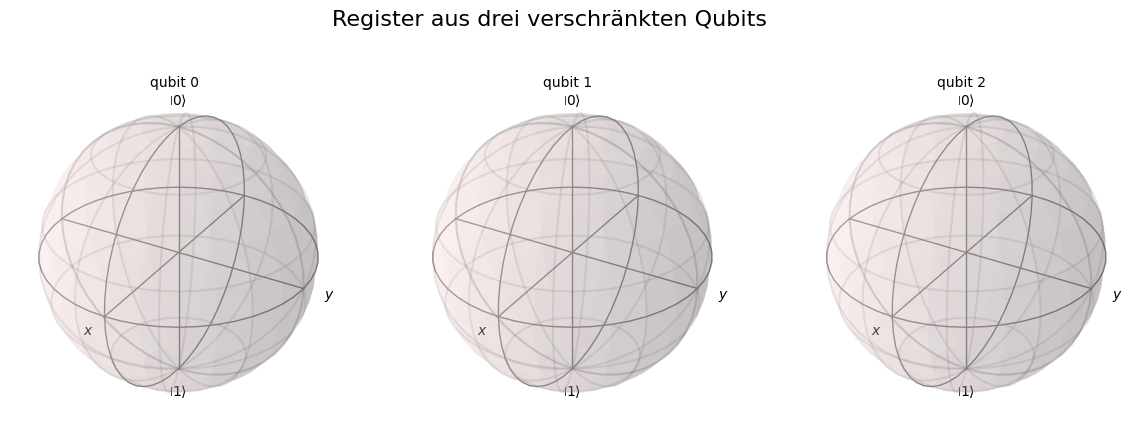

In [7]:
from qiskit.visualization import plot_bloch_multivector
from math import sqrt
a=1/sqrt(2)
plot_bloch_multivector([0, 0, 0, -a, a, 0, 0, 0], title='Register aus drei verschränkten Qubits')


 ### Darstellung mit der Q-Sphere

 Mit der Q-Sphere müsste es gehen. Probieren Sie es aus! Lassen Sie auch hier alle Zustände Durchlaufen

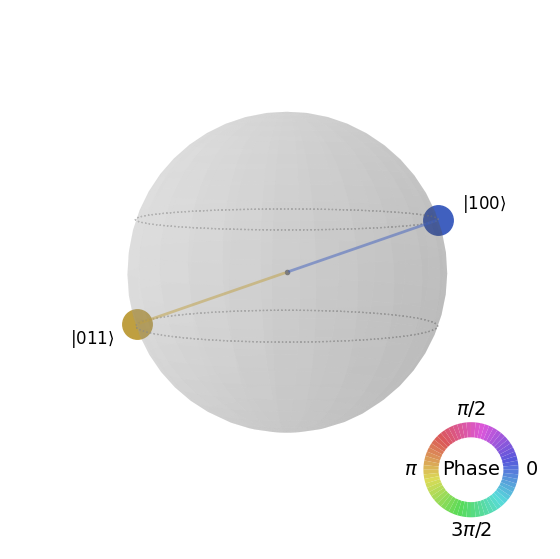

In [8]:
from qiskit.visualization import plot_state_qsphere
from math import sqrt
a=1/sqrt(2)
plot_state_qsphere([0, 0, 0, -a, a, 0, 0, 0])

### Kleines Projekt

Sind Sie es müde, die Gates und Zustandsvektoren immer von Hand einzugeben? Dann erstellen Sie ein Programm in Anlehnung an NB 13, das Ihnen alle Möglichkeiten selbständig ausgibt.